# CLASE 12 - Consolidación de Datos
#### Ejercicio práctico
----
## Actividad 1: Análisis de Ventas y Productos

### Objetivos:
* Cargar y explorar múltiples conjuntos de datos que contengan información sobre las ventas, productos y clientes.

* Limpiar y transformar los datos para garantizar su calidad y utilidad.

* Realizar un análisis descriptivo.


### Contexto:

* En esta semana de tu pasantía en SynthData, te asignaron la tarea de analizar la información de ventas de un cliente especializado en e-commerce. Silvia, la Project Manager y Data Scientist, te ofreció su apoyo para esta tarea. Esta análisis no solo es importante para entender las ventas pasadas, sino también para proponer mejoras y optimizaciones en las estrategias de comercialización.

### Consigna:

1. Cargá los conjuntos de datos que contienen la información sobre las ventas, productos y clientes.
2. Explorá cada DataFrame.
3. Limpiá los datos, eliminando duplicados y manejando valores nulos. Asegurate de que las columnas de fecha estén en el formato adecuado.
4. Ideá una manera de calcular el total gastado por cada cliente.
5. En cada paso, documentá tus hallazgos y las modificaciones que vas aplicando.
6. Realizá un análisis de las ventas por categoría de producto y visualizá los resultados utilizando gráficos de barras.

# Datasets:

* ventas.csv

* productos.csv

* clientes.csv




### 1. Cargá los conjuntos de datos que contienen la información sobre las ventas, productos y clientes.

In [1]:
# ----------------------------------------------------
# Importamos módulos (Librerías basicas)
# ----------------------------------------------------
import pandas as pd
import numpy as np

# ----------------------------------------------------
# Cargamos los DataFrames
# ----------------------------------------------------
ventas    = pd.read_csv("ventas.csv")
productos = pd.read_csv("productos.csv")
clientes  = pd.read_csv("clientes.csv")

# ----------------------------------------------------
# Obtenemos una vista rápida
# ----------------------------------------------------
print("ventas......:", ventas.shape)
print("productos...:", productos.shape)
print("clientes....:", clientes.shape)

ventas......: (919, 5)
productos...: (43, 5)
clientes....: (108, 5)


### 2. Explorá cada DataFrame.

In [2]:
# ----------------------------------------------------
# Dado que tenemos que "explorar" tres dataframes,
# escribo una función que haga lo necesario, y luego
# la uso con cada uno de los dataframes.
# ----------------------------------------------------
def explorar(df, nombre):
    print()
    print("-"*40)
    print(f"{nombre.upper()} ")
    print("-"*40)

    # ------------------------------------------------
    # Tamaño y tipos de datos
    # ------------------------------------------------
    print("Shape (filas, columnas):", df.shape)
    print("\nTipos de datos:")
    print(df.dtypes)

    # ------------------------------------------------
    # "Calidad" del dataframe (nulos, duplicados, etc)
    # ------------------------------------------------
    print()
    print("-"*40)
    print("Nulos por columna")
    print("-"*40)
    print(df.isna().sum())
    print()
    print("-"*40)
    print("Duplicados (filas exactas):", df.duplicated().sum())
    print("-"*40)

    # ------------------------------------------------
    # Muestra rápida del contenido
    # ------------------------------------------------
    print()
    print("-"*40)
    print("Primeras 5 filas")
    print("-"*40)
    display(df.head(5))

    # ------------------------------------------------
    # Resumen numérico y categórico
    # por separado para evitar problemas de versión
    # ------------------------------------------------
    print()
    num = df.select_dtypes(include="number")
    if not num.empty:
        print("-"*40)
        print("Resumen numérico")
        print("-"*40)
        # .T es para transponer y ver cada columna como fila (más cómodo).
        display(num.describe().T)
    else:
        print("-"*40)
        print("Resumen numérico")
        print("No hay columnas numéricas)")
        print("-"*40)

    cat = df.select_dtypes(include="object")
    if not cat.empty:
        print("-"*40)
        print("Resumen categórico")
        print("-"*40)
        display(cat.describe().T)
    else:
        print("-"*40)
        print("Resumen categórico")
        print("No hay columnas categóricas)")
        print("-"*40)


Exploramos **"ventas"**:

In [3]:
explorar(ventas, "ventas")


----------------------------------------
VENTAS 
----------------------------------------
Shape (filas, columnas): (919, 5)

Tipos de datos:
ID_Venta        int64
ID_Cliente      int64
ID_Producto     int64
Fecha          object
Cantidad        int64
dtype: object

----------------------------------------
Nulos por columna
----------------------------------------
ID_Venta       0
ID_Cliente     0
ID_Producto    0
Fecha          0
Cantidad       0
dtype: int64

----------------------------------------
Duplicados (filas exactas): 19
----------------------------------------

----------------------------------------
Primeras 5 filas
----------------------------------------


,ID_Venta,ID_Cliente,ID_Producto,Fecha,Cantidad
0,896,31,29,25/04/2025,5
1,358,97,11,21/07/2024,3
2,521,27,25,08/12/2024,10
3,384,6,5,28/10/2024,8
4,887,39,33,02/04/2025,1



----------------------------------------
Resumen numérico
----------------------------------------


,count,mean,std,min,25%,50%,75%,max
ID_Venta,919.0,448.794342,260.915357,1.0,220.5,448.0,674.5,900.0
ID_Cliente,919.0,52.286181,29.224914,1.0,27.0,53.0,79.0,100.0
ID_Producto,919.0,15.813928,8.644339,1.0,8.0,16.0,23.0,35.0
Cantidad,919.0,5.420022,2.821075,1.0,3.0,5.0,8.0,10.0


----------------------------------------
Resumen categórico
----------------------------------------


,count,unique,top,freq
Fecha,919,338,19/06/2024,8


Exploramos **"productos"**:

In [4]:
explorar(productos, "productos")


----------------------------------------
PRODUCTOS 
----------------------------------------
Shape (filas, columnas): (43, 5)

Tipos de datos:
ID_Producto          int64
Nombre_Producto     object
Categoría           object
Precio_Unitario    float64
Stock                int64
dtype: object

----------------------------------------
Nulos por columna
----------------------------------------
ID_Producto        0
Nombre_Producto    0
Categoría          0
Precio_Unitario    0
Stock              0
dtype: int64

----------------------------------------
Duplicados (filas exactas): 7
----------------------------------------

----------------------------------------
Primeras 5 filas
----------------------------------------


,ID_Producto,Nombre_Producto,Categoría,Precio_Unitario,Stock
0,29,Proyector,Multimedia,60.0,4
1,28,Altavoces portátiles,Audio y Sonido,7.0,55
2,14,Smartwatch / reloj inteligente,Wearables,50.0,35
3,21,Licuadora,Electrodomésticos,15.0,40
4,15,Calefón eléctrico,Electrodomésticos,95.0,10



----------------------------------------
Resumen numérico
----------------------------------------


,count,mean,std,min,25%,50%,75%,max
ID_Producto,43.0,16.790698,10.418752,1.0,8.0,15.0,25.5,36.0
Precio_Unitario,43.0,73.569767,71.519776,2.0,14.0,45.0,120.0,250.0
Stock,43.0,29.883721,30.467945,4.0,10.0,20.0,40.0,150.0


----------------------------------------
Resumen categórico
----------------------------------------


,count,unique,top,freq
Nombre_Producto,43,36,Desktop PC,2
Categoría,43,21,Electrodomésticos,6


Exploramos **"clientes"**:

In [5]:
explorar(clientes, "clientes")


----------------------------------------
CLIENTES 
----------------------------------------
Shape (filas, columnas): (108, 5)

Tipos de datos:
ID_Cliente     int64
Nombre        object
Edad           int64
Ciudad        object
Ingresos      object
dtype: object

----------------------------------------
Nulos por columna
----------------------------------------
ID_Cliente    0
Nombre        0
Edad          0
Ciudad        0
Ingresos      0
dtype: int64

----------------------------------------
Duplicados (filas exactas): 8
----------------------------------------

----------------------------------------
Primeras 5 filas
----------------------------------------


,ID_Cliente,Nombre,Edad,Ciudad,Ingresos
0,10,Yolanda Wren,28,Vicente López,$899700.72
1,91,Winona Jamme,35,Adrogué,$669747.95
2,34,Elora Howford,29,Tres de Febrero,$710610.80
3,29,Ennis Dilley,33,Morovín,$2015751.52
4,30,Baily Habercham,32,Esteban Echeverría,$1885401.91



----------------------------------------
Resumen numérico
----------------------------------------


,count,mean,std,min,25%,50%,75%,max
ID_Cliente,108.0,47.537037,29.831122,1.0,19.75,46.5,73.25,100.0
Edad,108.0,33.120370,4.421100,21.0,30.00,33.0,36.00,45.0


----------------------------------------
Resumen categórico
----------------------------------------


,count,unique,top,freq
Nombre,108,100,Yolanda Wren,2
Ciudad,108,33,Quilmes,8
Ingresos,108,100,$899700.72,2


### 3. Limpiá los datos, eliminando duplicados y manejando valores nulos. Asegurate de que las columnas de fecha estén en el formato adecuado.

In [6]:
# Utilidades
def moneda_a_float(s):
    s = (s.astype(str)
           .str.replace(r'[$\s]', '', regex=True)
           .str.replace('.', '', regex=False)   # separador miles
           .str.replace(',', '.', regex=False)) # decimal
    s = s.replace({'nan': np.nan})
    return pd.to_numeric(s, errors='coerce')



In [7]:
# ----------------------------------------------------
# CONTROLES PREVIOS: VENTAS
# ----------------------------------------------------
prev_shape_v = ventas.shape
prev_nulos_cantidad_v = ventas['Cantidad'].isna().sum()
prev_dup_v = ventas.duplicated().sum()

print("-"*40)
print("Antes de limpiar (VENTAS)")
print("-"*40)
print("shape:", prev_shape_v,
      "| nulos Cantidad:", prev_nulos_cantidad_v,
      "| duplicados:", prev_dup_v)

# Parsear fecha
ventas['Fecha'] = pd.to_datetime(ventas['Fecha'], dayfirst=True, errors='coerce')

# (Opcional) Si queremos eliminar filas con Fecha NaT o Cantidad nula:
mask_validos_v = ventas['Fecha'].notna() & ventas['Cantidad'].notna()
elim_nulos_v = (~mask_validos_v).sum()
ventas = ventas[mask_validos_v].copy()

# Duplicados
len_antes_v = len(ventas)
ventas = ventas.drop_duplicates().copy()
dup_eliminados_v = len_antes_v - len(ventas)

print("-"*40)
print("Después de limpiar (VENTAS)")
print("-"*40)
print("shape:", ventas.shape)
print("Filas eliminadas (Fecha/Cantidad nulas):", elim_nulos_v)
print("Duplicados eliminados:", dup_eliminados_v)
print("Rango de fechas:", ventas['Fecha'].min(), " a ", ventas['Fecha'].max())
print()
display(ventas.head(3))

----------------------------------------
Antes de limpiar (VENTAS)
----------------------------------------
shape: (919, 5) | nulos Cantidad: 0 | duplicados: 19
----------------------------------------
Después de limpiar (VENTAS)
----------------------------------------
shape: (900, 5)
Filas eliminadas (Fecha/Cantidad nulas): 0
Duplicados eliminados: 19
Rango de fechas: 2024-06-04 00:00:00  a  2025-06-03 00:00:00



,ID_Venta,ID_Cliente,ID_Producto,Fecha,Cantidad
0,896,31,29,2025-04-25,5
1,358,97,11,2024-07-21,3
2,521,27,25,2024-12-08,10


In [8]:
# ----------------------------------------------------
# CONTROLES PREVIOS: PRODUCTOS
# ----------------------------------------------------

prev_shape_p = productos.shape
prev_dup_p   = productos.duplicated().sum()
prev_nulos_id_p = productos['ID_Producto'].isna().sum()

print("\n" + "="*60)
print("LIMPIEZA: PRODUCTOS")
print("="*60)
print("-"*40)
print("Antes de limpiar (PRODUCTOS)")
print("-"*40)
print("shape:", prev_shape_p,
      "| nulos ID_Producto:", prev_nulos_id_p,
      "| duplicados:", prev_dup_p)

# Asegurar numeric (por seguridad; ya es float64 según vimos)
productos['Precio_Unitario'] = pd.to_numeric(productos['Precio_Unitario'], errors='coerce')

# Strip en texto (por seguridad; opcional)
for c in ['Nombre_Producto', 'Categoría']:
    if c in productos.columns:
        productos[c] = productos[c].astype("string").str.strip()

# Duplicados
len_antes_p = len(productos)
productos = productos.drop_duplicates().copy()
dup_eliminados_p = len_antes_p - len(productos)

# Filas sin ID_Producto
elim_sin_id_p = productos['ID_Producto'].isna().sum()
productos = productos[productos['ID_Producto'].notna()].copy()

print("-"*40)
print("Después de limpiar (PRODUCTOS)")
print("-"*40)
print("shape:", productos.shape)
print("Duplicados eliminados:", dup_eliminados_p)
print("Filas sin ID_Producto (eliminadas):", elim_sin_id_p)
print()
display(productos.head(3))


LIMPIEZA: PRODUCTOS
----------------------------------------
Antes de limpiar (PRODUCTOS)
----------------------------------------
shape: (43, 5) | nulos ID_Producto: 0 | duplicados: 7
----------------------------------------
Después de limpiar (PRODUCTOS)
----------------------------------------
shape: (36, 5)
Duplicados eliminados: 7
Filas sin ID_Producto (eliminadas): 0



,ID_Producto,Nombre_Producto,Categoría,Precio_Unitario,Stock
0,29,Proyector,Multimedia,60.0,4
1,28,Altavoces portátiles,Audio y Sonido,7.0,55
2,14,Smartwatch / reloj inteligente,Wearables,50.0,35


In [9]:
# ----------------------------------------------------
# CONTROLES PREVIOS: CLIENTES
# ----------------------------------------------------
prev_shape_c = clientes.shape
prev_dup_c   = clientes.duplicated().sum()
prev_nulos_id_c = clientes['ID_Cliente'].isna().sum()

print("\n" + "="*60)
print("LIMPIEZA: CLIENTES")
print("="*60)
print("-"*40)
print("Antes de limpiar (CLIENTES)")
print("-"*40)
print("shape:", prev_shape_c,
      "| nulos ID_Cliente:", prev_nulos_id_c,
      "| duplicados:", prev_dup_c)

# Normalizar 'Ingresos' (object a float)
clientes['Ingresos'] = moneda_a_float(clientes['Ingresos'])

# Strip en texto
for c in ['Nombre', 'Ciudad']:
    if c in clientes.columns:
        clientes[c] = clientes[c].astype("string").str.strip()

# Duplicados
len_antes_c = len(clientes)
clientes = clientes.drop_duplicates().copy()
dup_eliminados_c = len_antes_c - len(clientes)

# Filas sin ID_Cliente
elim_sin_id_c = clientes['ID_Cliente'].isna().sum()
clientes = clientes[clientes['ID_Cliente'].notna()].copy()

print("-"*40)
print("Después de limpiar (CLIENTES)")
print("-"*40)
print("shape:", clientes.shape)
print("Duplicados eliminados:", dup_eliminados_c)
print("Filas sin ID_Cliente (eliminadas):", elim_sin_id_c)
print()
display(clientes.head(3))



LIMPIEZA: CLIENTES
----------------------------------------
Antes de limpiar (CLIENTES)
----------------------------------------
shape: (108, 5) | nulos ID_Cliente: 0 | duplicados: 8
----------------------------------------
Después de limpiar (CLIENTES)
----------------------------------------
shape: (100, 5)
Duplicados eliminados: 8
Filas sin ID_Cliente (eliminadas): 0



,ID_Cliente,Nombre,Edad,Ciudad,Ingresos
0,10,Yolanda Wren,28,Vicente López,89970072
1,91,Winona Jamme,35,Adrogué,66974795
2,34,Elora Howford,29,Tres de Febrero,71061080


### 4. Ideá una manera de calcular el total gastado por cada cliente.

In [10]:
# ====================================================
# 4) Total gastado por cada cliente
#   Estrategia que voy a seguir (no es la única, vos
#   podes seguir otra):
#   - Unir VENTAS con PRODUCTOS por ID_Producto para
#     obtener Precio_Unitario.
#   - Calcular Importe = Cantidad * Precio_Unitario.
#   - Agregar por ID_Cliente (y completar con datos
#     de CLIENTES).
# ====================================================

# ----------------------------------------------------
# 4.1) Merge VENTAS + PRODUCTOS
#      Se unen los DataFrames ventas y productos usando
#      la columna ID_Producto como clave y obtener Precio_Unitario
# ----------------------------------------------------
cols_prod_min = ['ID_Producto', 'Precio_Unitario']
ventas_prod = ventas.merge(productos[cols_prod_min],
                           on='ID_Producto',
                           how='left',
                           validate='many_to_one')  # cada producto se repite en ventas (N:1)

# Se realiza un pequeño diagnóstico para detectar si hubo
# productos sin precio (NaN), y se filtran para evitar sesgos:
sin_precio = ventas_prod['Precio_Unitario'].isna().sum()
print("-"*40)
print("Diagnóstico post-merge VENTAS - PRODUCTOS")
print("-"*40)
print("Filas con Precio_Unitario faltante:", sin_precio)

# Opción: excluir del cálculo las filas sin precio
# (recomendado para no sesgar los resultados)
ventas_prod_validas = ventas_prod[ventas_prod['Precio_Unitario'].notna()].copy()

# ----------------------------------------------------
# 4.2) Calcular IMPORTE y agregar por cliente
# ----------------------------------------------------
# Se calcula una nueva columna Importe, que representa
# el total gastado en cada transacción individual.
ventas_prod_validas['Importe'] = ventas_prod_validas['Cantidad'] * ventas_prod_validas['Precio_Unitario']


# Se agrupa por cliente (ID_Cliente) y se resumen las métricas principales:
resumen_clientes = (ventas_prod_validas
                    .groupby('ID_Cliente', as_index=False)
                    .agg(
                        Total_Gastado=('Importe', 'sum'),  # suma del importe total de sus compras.
                        Compras=('ID_Venta', 'nunique'),   # cantidad de ventas (transacciones)
                        Items=('Cantidad', 'sum')          # unidades totales
                    ))

# Ticket promedio por compra
resumen_clientes['Ticket_Promedio'] = (resumen_clientes['Total_Gastado'] / resumen_clientes['Compras']).round(2)

# Ordenar por mayor gasto
resumen_clientes = resumen_clientes.sort_values('Total_Gastado', ascending=False, ignore_index=True)

print()
print("-"*40)
print("Resumen por cliente (métricas principales)")
print("-"*40)
display(resumen_clientes.head(10))

# ----------------------------------------------------
# 4.3) Agregar datos de CLIENTES (Nombre, Ciudad, Ingresos)
#     Se vuelve a realizar un merge, ahora con el DataFrame
#     clientes, para agregar información contextual:
#                             nombre, ciudad e ingresos.
# ----------------------------------------------------
cols_cli_min = ['ID_Cliente', 'Nombre', 'Ciudad', 'Ingresos']
resumen_clientes_det = (resumen_clientes
                        .merge(clientes[cols_cli_min], on='ID_Cliente', how='left', validate='one_to_one'))

# Reordenar columnas para lectura más cómoda
cols_orden = ['ID_Cliente', 'Nombre', 'Ciudad', 'Ingresos',
              'Compras', 'Items', 'Total_Gastado', 'Ticket_Promedio']
resumen_clientes_det = resumen_clientes_det[cols_orden]

print()
print("-"*40)
print("Top 10 clientes por Total_Gastado (enriquecido)")
print("-"*40)
display(resumen_clientes_det.head(10))

# (Opcional) Guardar a CSV
# resumen_clientes_det.to_csv("total_gastado_por_cliente.csv", index=False)


----------------------------------------
Diagnóstico post-merge VENTAS - PRODUCTOS
----------------------------------------
Filas con Precio_Unitario faltante: 0

----------------------------------------
Resumen por cliente (métricas principales)
----------------------------------------


,ID_Cliente,Total_Gastado,Compras,Items,Ticket_Promedio
0,79,16443.0,20,137,822.15
1,96,9652.0,17,109,567.76
2,15,9215.0,14,85,658.21
3,85,8179.5,15,90,545.30
4,8,7295.0,13,81,561.15
5,81,7196.0,15,80,479.73
6,98,6875.0,11,64,625.00
7,93,6411.0,10,62,641.10
8,37,6094.0,12,74,507.83
9,48,6068.5,13,76,466.81



----------------------------------------
Top 10 clientes por Total_Gastado (enriquecido)
----------------------------------------


,ID_Cliente,Nombre,Ciudad,Ingresos,Compras,Items,Total_Gastado,Ticket_Promedio
0,79,Lydia Proby,San Fernando,174669942,20,137,16443.0,822.15
1,96,Gaylord MacGibbon,Lanús,200017103,17,109,9652.0,567.76
2,15,Natasha Velden,Monte,84706420,14,85,9215.0,658.21
3,85,Toma Yurasov,Ituzaingó,122039879,15,90,8179.5,545.30
4,8,Nona Jordine,Escobar,116260820,13,81,7295.0,561.15
5,81,Chevalier Rivlin,Escobar,192334313,15,80,7196.0,479.73
6,98,Jaclyn Streeter,Adrogué,107378068,11,64,6875.0,625.00
7,93,Berte Creser,Morovín,140063034,10,62,6411.0,641.10
8,37,Lark Motton,Punta Lara,225045992,12,74,6094.0,507.83
9,48,Romy Nobles,Esteban Echeverría,169864071,13,76,6068.5,466.81


### 6. Realizá un análisis de las ventas por categoría de producto y visualizá los resultados utilizando gráficos de barras.

----------------------------------------
Resumen de ventas por categoría
----------------------------------------


,Categoría,Total_Vendido,Items,Ventas
0,Electrodomésticos,83750.0,977,178
1,Computación Personal,45700.0,270,48
2,Televisores,38640.0,184,31
3,Telefonía y Comunicaciones,36000.0,200,36
4,Fotografía,34200.0,190,28
5,Video y Fotografía,28990.0,223,43
6,Climatización,23880.0,199,37
7,Computación de Escritorio,13560.0,113,24
8,Tablets y E-Readers,11685.0,123,23
9,Consolas y Videojuegos,11500.0,115,24


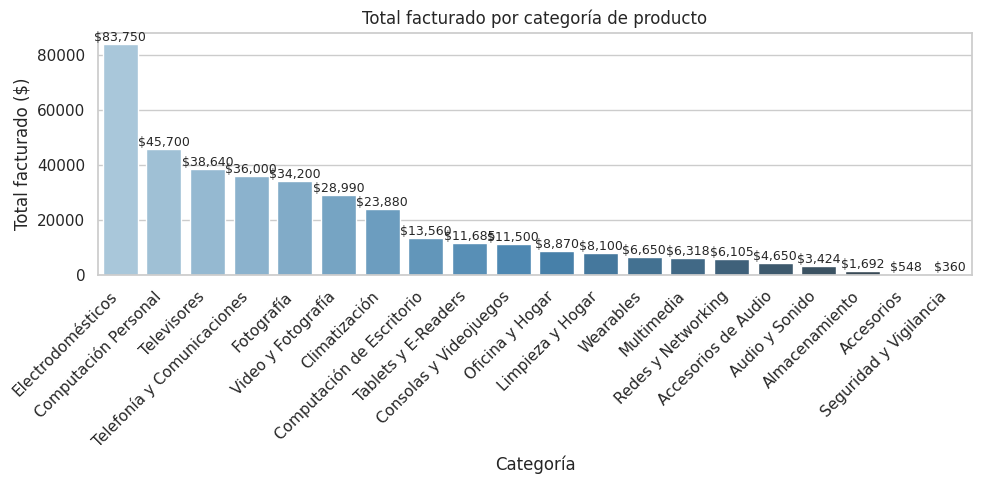

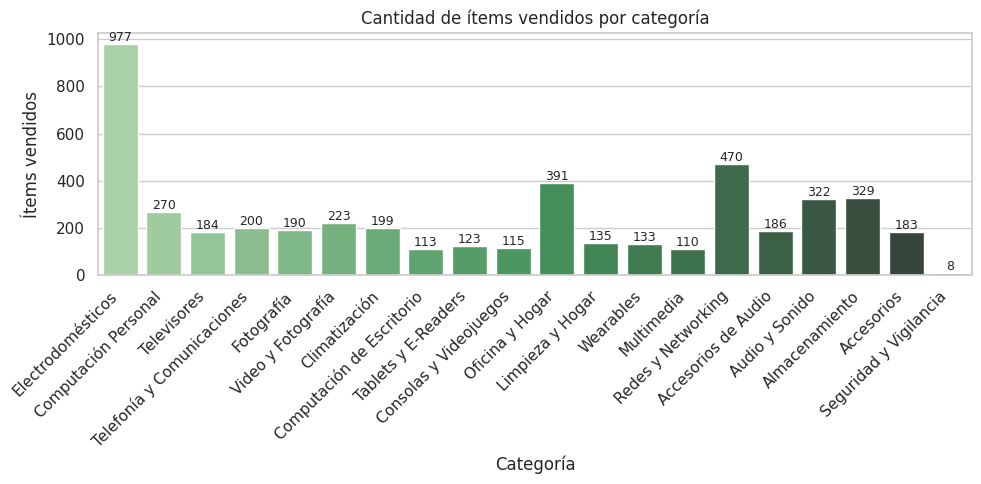

In [11]:
# ====================================================
# 6) Análisis de ventas por CATEGORÍA + gráficos
# (Continuamos desde el punto 4)
# ====================================================
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------------------------
# Usamos el dataframe "ventas_prod_validas" del punto 4,
# que ya contiene: ID_Producto, Cantidad, Precio_Unitario
# ----------------------------------------------------

# ----------------------------------------------------
# 1) Agregamos la categoría desde "productos"
# ----------------------------------------------------
# La unión se hace a través de la columna común ID_Producto,
# usando un join tipo left, lo que significa que se conservan
# todas las filas de ventas_prod_validas y se añade, cuando
# exista coincidencia, la columna Categoría correspondiente
# desde productos. Así, cada registro de venta queda asociado
# con la categoría del producto vendido.
ventas_cat = ventas_prod_validas.merge(
    productos[['ID_Producto', 'Categoría']],
    on='ID_Producto',
    how='left'
)


# ----------------------------------------------------
# 2) Agrupamos por categoría
# ----------------------------------------------------
# Agrupa las ventas por categoría de producto y calcula
# indicadores resumidos para cada una. Con groupby('Categoría')
# reúne todas las filas que pertenecen a la misma categoría y,
# dentro de cada grupo, aplica tres agregaciones:
#
# * la suma de Importe (monto total vendido),
# * la suma de Cantidad (cantidad total de ítems vendidos) y
# * el conteo de ID_Venta únicos (número de ventas o transacciones).
#
# Luego ordena el resultado de mayor a menor según Total_Vendido,
# generando una tabla resumen que muestra qué categorías tuvieron
# más facturación y volumen de ventas.

ventas_por_categoria = (
    ventas_cat
    .groupby('Categoría', as_index=False)
    .agg(
        Total_Vendido=('Importe', 'sum'),
        Items=('Cantidad', 'sum'),
        Ventas=('ID_Venta', 'nunique')
    )
    .sort_values('Total_Vendido', ascending=False, ignore_index=True)
)


# ----------------------------------------------------
# 3) Mostramos el resumen
# ----------------------------------------------------
print("-"*40)
print("Resumen de ventas por categoría")
print("-"*40)
display(ventas_por_categoria)

# ----------------------------------------------------
# 4) Visualización con gráficos de barras
# ----------------------------------------------------
sns.set_theme(style="whitegrid")  # estilo más limpio

# --- Gráfico 1: Total facturado por categoría ---
plt.figure(figsize=(10,5))
grafico1 = sns.barplot(
    data=ventas_por_categoria,
    x='Categoría',
    y='Total_Vendido',
    hue='Categoría',
    palette='Blues_d'
)
plt.title("Total facturado por categoría de producto")
plt.xlabel("Categoría")
plt.ylabel("Total facturado ($)")
plt.xticks(rotation=45, ha='right')
for index, row in ventas_por_categoria.iterrows():
    grafico1.text(index, row.Total_Vendido, f"${row.Total_Vendido:,.0f}",
                  ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

# --- Gráfico 2: Cantidad de ítems vendidos por categoría ---
plt.figure(figsize=(10,5))
grafico2 = sns.barplot(
    data=ventas_por_categoria,
    x='Categoría',
    y='Items',
    hue='Categoría',
    palette='Greens_d'
)
plt.title("Cantidad de ítems vendidos por categoría")
plt.xlabel("Categoría")
plt.ylabel("Ítems vendidos")
plt.xticks(rotation=45, ha='right')
for index, row in ventas_por_categoria.iterrows():
   grafico2.text(index, row.Items, f"{row.Items:,}",
                 ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

### EXTRA: ¿Correlacion?

Podemos hacer un `scatterplot`, para ver si las categorías que más ítems venden también son las que más facturan (es decir, si existe una **relación lineal** entre ambas variables).

Podemos hacerlo con un **diagrama de dispersión (scatter plot)**, donde cada punto representa una categoría:

* Eje X: `Items` (cantidad de productos vendidos)
* Eje Y: `Total_Vendido` (monto total facturado)

Además, podemos mostrar la **línea de tendencia** y el **coeficiente de correlación de Pearson**, que mide qué tan fuerte es esa relación.




Coeficiente de correlación (Pearson): 0.635


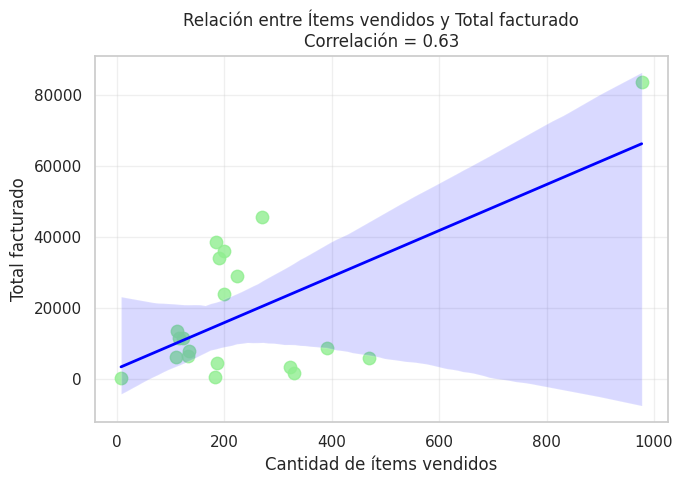

In [12]:
# ====================================================
# Correlación entre Ítems vendidos y Total facturado
# ====================================================
import seaborn as sns

# 1) Calculamos el coeficiente de correlación
corr = ventas_por_categoria['Items'].corr(ventas_por_categoria['Total_Vendido'])

print(f"Coeficiente de correlación (Pearson): {corr:.3f}")

# 2) Creamos el gráfico de dispersión con línea de tendencia
plt.figure(figsize=(7,5))
sns.regplot(
    data=ventas_por_categoria,
    x='Items',
    y='Total_Vendido',
    scatter_kws={'color':'lightgreen', 's':80},
    line_kws={'color':'blue', 'lw':2}
)

plt.title(f"Relación entre Ítems vendidos y Total facturado\nCorrelación = {corr:.2f}")
plt.xlabel("Cantidad de ítems vendidos")
plt.ylabel("Total facturado")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Interpretación:

* Si el coeficiente de correlación (`corr`) es cercano a **+1**, significa que las categorías que venden más ítems también generan más ingresos (relación positiva fuerte).
* Si es cercano a **0**, no hay una relación clara entre cantidad vendida y facturación.
* Si fuera negativo (raro en este contexto), implicaría que las categorías con más unidades vendidas facturan menos, quizá por precios bajos.


